In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
housing=pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [154]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [155]:
status=pd.get_dummies(housing.furnishingstatus,drop_first=True)

In [156]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [157]:
housing=pd.concat([housing,status],axis=1)

In [158]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0


In [159]:
housing=housing.drop(['furnishingstatus'],1)

In [160]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [161]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000


In [162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [163]:
housing.mainroad=le.fit_transform(housing.mainroad)
housing.guestroom=le.fit_transform(housing.guestroom)
housing.basement=le.fit_transform(housing.basement)
housing.hotwaterheating=le.fit_transform(housing.hotwaterheating)
housing.airconditioning=le.fit_transform(housing.airconditioning)
housing.prefarea=le.fit_transform(housing.prefarea)

In [164]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


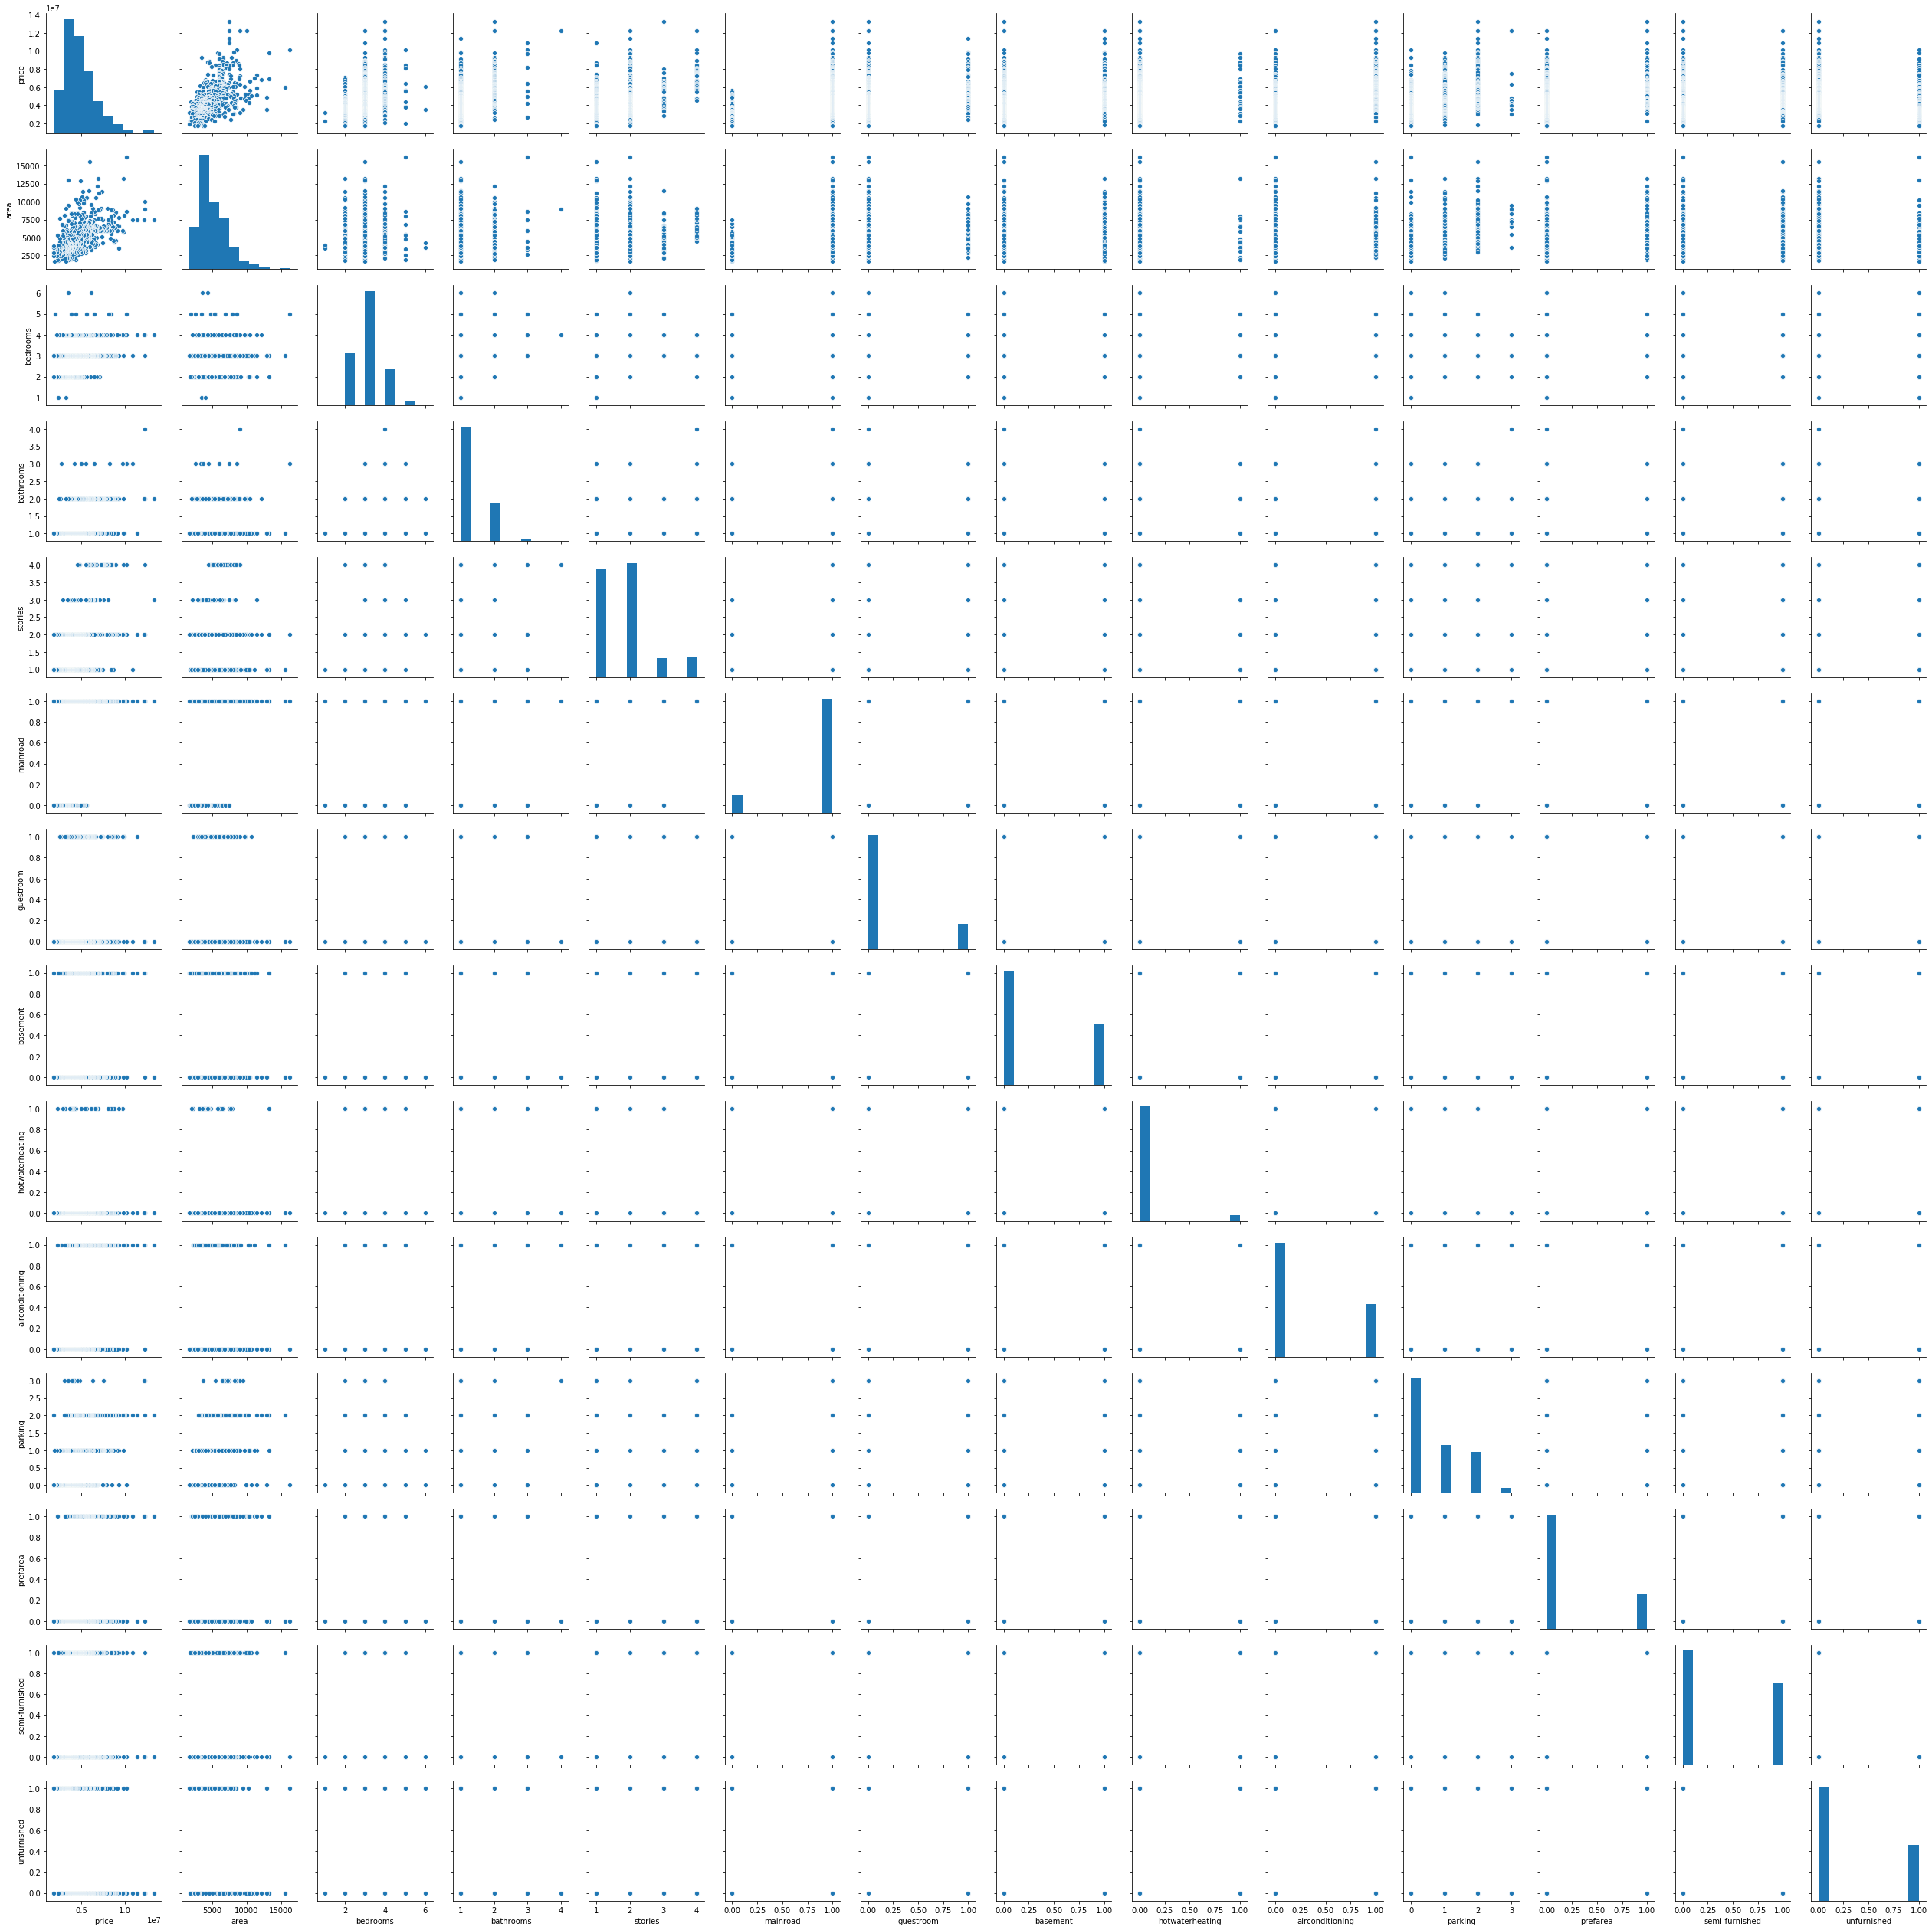

In [100]:
sns.pairplot(housing)

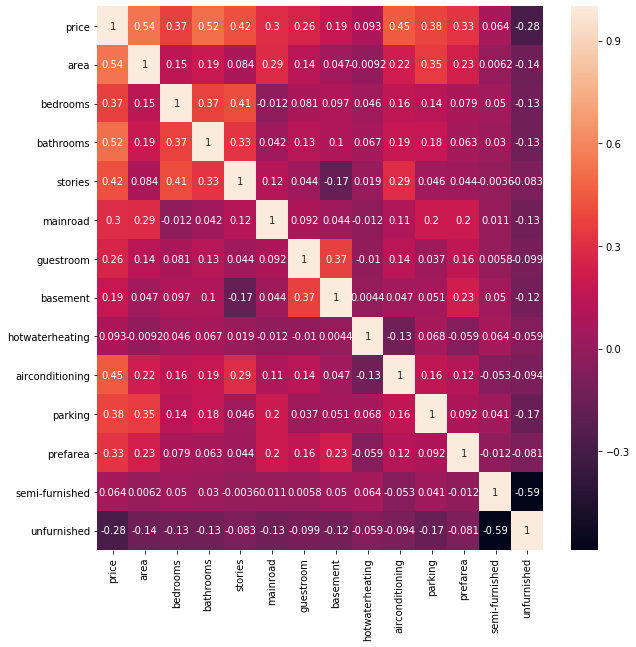

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(),annot=True)

In [165]:
housing=housing.drop(['unfurnished'],1)

In [166]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int32
guestroom          545 non-null int32
basement           545 non-null int32
hotwaterheating    545 non-null int32
airconditioning    545 non-null int32
parking            545 non-null int64
prefarea           545 non-null int32
semi-furnished     545 non-null uint8
dtypes: int32(6), int64(6), uint8(1)
memory usage: 38.9 KB


In [167]:
X=housing.drop(['price'],1)
y=housing.price

In [168]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [169]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [171]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [172]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,10)

In [174]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [175]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 3),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', True, 1)]

In [176]:
X_train=X_train.drop(['area','bedrooms'],1)

In [177]:
X_train.head()

,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished
227,1,1,1,0,1,0,1,1,0,0
319,1,3,1,0,1,0,1,2,0,1
367,1,1,1,0,0,0,1,0,0,0
515,1,2,1,0,1,0,0,0,0,0
143,2,3,0,0,1,1,0,0,0,0


In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [179]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit(X_test)

In [180]:
import statsmodels.api as sm

In [181]:
X_train_sm=sm.add_constant(X_train)
train_ols=sm.OLS(y_train,X_train_sm).fit()

In [182]:
print(train_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     60.78
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.54e-72
Time:                        01:33:30   Log-Likelihood:                -5862.4
No. Observations:                 381   AIC:                         1.175e+04
Df Residuals:                     370   BIC:                         1.179e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.492e+05   2.38e+05     

In [183]:
X_train=X_train.drop(['guestroom'],1)

In [184]:
X_train.shape

(381, 9)

In [185]:
y_train.shape

(381,)

In [186]:
X_train_sm=sm.add_constant(X_train)
train_ols_2=sm.OLS(y_train,X_train).fit()

In [187]:
print(train_ols_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              734.9
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                   8.14e-231
Time:                        01:33:34   Log-Likelihood:                         -5865.6
No. Observations:                 381   AIC:                                  1.175e+04
Df Residuals:                     372   BIC:                                  1.178e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [188]:
X_test_sm=sm.add_constant(X_test)
test_ols=sm.OLS(y_test,X_test_sm).fit()

In [189]:
print(test_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     23.43
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           9.96e-29
Time:                        01:33:36   Log-Likelihood:                -2509.2
No. Observations:                 164   AIC:                             5044.
Df Residuals:                     151   BIC:                             5085.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.894e+05   5.08e+05     

In [190]:
X_test=X_test.drop(['semi-furnished'],1)

In [191]:
X_test_sm=sm.add_constant(X_test)
test_ols_2=sm.OLS(y_test,X_test_sm).fit()

In [192]:
print(test_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     25.70
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           2.03e-29
Time:                        01:33:44   Log-Likelihood:                -2509.3
No. Observations:                 164   AIC:                             5043.
Df Residuals:                     152   BIC:                             5080.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.783e+05   5.05e+05     

In [193]:
X_test=X_test.drop(['hotwaterheating'],1)

In [194]:
X_test_sm=sm.add_constant(X_test)
test_ols_3=sm.OLS(y_test,X_test_sm).fit()

In [195]:
print(test_ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     28.38
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.17e-30
Time:                        01:33:48   Log-Likelihood:                -2509.4
No. Observations:                 164   AIC:                             5041.
Df Residuals:                     153   BIC:                             5075.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.291e+05   4.94e+05     

In [196]:
X_test=X_test.drop(['bedrooms'],1)

In [197]:
X_test_sm=sm.add_constant(X_test)
test_ols_4=sm.OLS(y_test,X_test_sm).fit()

In [198]:
print(test_ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     31.39
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.22e-30
Time:                        01:33:53   Log-Likelihood:                -2510.0
No. Observations:                 164   AIC:                             5040.
Df Residuals:                     154   BIC:                             5071.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.113e+05   3.72e+05     

In [199]:
X_test=X_test.drop(['mainroad'],1)

In [200]:
X_test_sm=sm.add_constant(X_test)
test_ols_5=sm.OLS(y_test,X_test).fit()

In [201]:
print(test_ols_5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              429.9
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                   3.92e-102
Time:                        01:33:56   Log-Likelihood:                         -2511.2
No. Observations:                 164   AIC:                                      5038.
Df Residuals:                     156   BIC:                                      5063.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [202]:
X_test=X_test.drop(['basement'],1)

In [203]:
X_test_sm=sm.add_constant(X_test)
test_ols_6=sm.OLS(y_test,X_test_sm).fit()

In [204]:
print(test_ols_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     39.81
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.11e-31
Time:                        01:34:00   Log-Likelihood:                -2511.4
No. Observations:                 164   AIC:                             5039.
Df Residuals:                     156   BIC:                             5064.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.428e+05   3.29e+05     

In [205]:
X_test=X_test.drop(['guestroom', 'area'],1)

In [213]:
X_test_new=X_test[X_test.columns]
X_train_new=X_train[X_test.columns]

In [214]:
X_test_new.head()

,bathrooms,stories,airconditioning,parking,prefarea
225,1,1,1,3,0
18,2,2,1,2,0
48,2,2,0,1,0
355,1,1,0,2,0
350,1,2,0,1,0


In [215]:
X_train_new.head()

,bathrooms,stories,airconditioning,parking,prefarea
227,1,1,1,1,0
319,1,3,1,2,0
367,1,1,1,0,0
515,1,2,0,0,0
143,2,3,0,0,0


In [216]:
X_test_new.shape

(164, 5)

In [217]:
X_test_new.shape

(164, 5)

In [218]:
y_train.shape

(381,)

In [219]:
y_test.shape

(164,)

In [220]:
lr.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
y_pred=lr.predict(X_train_new)

In [223]:
from sklearn.metrics import r2_score

In [225]:
r2_score(y_train,y_pred)

0.5644805262570134

In [226]:
y_test_pred=lr.predict(X_test_new)

In [227]:
r2_score(y_test,y_test_pred)

0.5437961452797324